In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import keras.backend as K
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.regularizers import l1_l2
from sklearn.metrics import accuracy_score
from collections import OrderedDict, Counter
from tensorflow.python.ops import gen_array_ops
from keras.layers import Dense, Dropout, Flatten
from names import Names as n

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
matplotlib.use("tkagg")
%matplotlib inline

In [3]:
df1 = pd.read_csv("models/cfu_neural_network/df_for_testing.csv")
df2 = pd.read_csv("models/cfu_neural_network/df_for_testing_2.csv")

In [4]:
sns.__version__

'0.11.0'

In [5]:
df1

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,inducer_concentration,timepoint,label,label_probs,percent_live
0,4.937493,4.852639,1.612784,4.545703,4.432199,1.477121,0.0,0.5,1.0,0.973972,39.67
1,4.881054,4.769717,1.591065,4.593319,4.483273,1.491362,0.0,0.5,1.0,0.903544,39.67
2,5.217273,5.056962,1.716003,5.115637,4.985498,1.662758,0.0,0.5,1.0,0.986633,39.67
3,4.837431,4.795463,1.568202,4.394942,4.333971,1.397940,0.0,0.5,1.0,0.808509,39.67
4,5.224023,4.771183,1.977724,4.895577,4.490436,1.838849,0.0,0.5,1.0,0.930113,39.67
...,...,...,...,...,...,...,...,...,...,...,...
259537,4.086538,3.939769,0.000000,4.006380,3.955592,0.000000,80.0,6.0,0.0,0.008962,0.00
259538,6.020599,5.369036,3.009876,6.020599,6.020599,3.009876,80.0,6.0,0.0,0.359544,0.00
259539,3.429591,3.334454,0.000000,3.146438,2.997386,0.000000,80.0,6.0,0.0,0.000011,0.00
259540,3.640680,3.509337,0.000000,3.005181,2.911690,0.000000,80.0,6.0,0.0,0.000799,0.00


In [6]:
df2

,inducer_concentration,timepoint,BL1-A,BL1-H,BL1-W,BL2-A,BL2-H,BL2-W,BL3-A,BL3-H,BL3-W,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,YL1-A,YL1-H,YL1-W,YL2-A,YL2-H,YL2-W,YL3-A,YL3-H,YL3-W,YL4-A,YL4-H,YL4-W,percent_live
0,5.0,0.5,5.36859,3.44529,3.00988,5.45703,4.40106,3.00988,5.40084,3.86475,3.00988,6.02060,6.02060,3.00988,6.02060,6.02060,3.00988,5.86115,5.17642,3.00988,4.89080,4.19915,3.00988,4.48959,3.64118,3.00988,4.41692,3.51014,3.00988,95.423333
1,5.0,0.5,2.22789,2.34439,1.54407,3.04139,2.67025,1.91381,2.81158,2.67302,1.71600,5.82203,5.74378,2.04532,5.76677,5.69276,2.07188,2.69810,2.69636,1.80618,2.32428,2.02531,0.30103,2.36361,2.20952,1.39794,1.93450,2.29003,1.20412,95.423333
2,5.0,0.5,2.96802,2.77305,1.71600,3.33264,2.85794,2.19590,3.40671,2.87274,2.12385,6.02060,5.92777,2.26951,6.02060,6.01622,2.26951,3.68520,3.29798,2.12385,2.64738,2.26482,1.61278,2.39445,2.27184,1.38021,2.08636,2.31175,1.44716,95.423333
3,5.0,0.5,3.36361,3.33244,1.68124,4.28704,4.24756,1.97313,3.85721,3.82210,1.93952,5.64631,5.59336,1.98677,5.87543,5.84972,2.00860,5.04363,5.01181,1.97313,4.07401,4.03543,1.96379,3.49499,3.48770,1.88649,3.26316,3.27416,1.72428,95.423333
4,5.0,0.5,0.00000,2.34242,1.07918,2.40483,2.46538,1.43136,2.64048,2.80072,1.49136,4.54809,4.48524,1.81291,4.74266,4.75730,1.81291,2.48714,2.63043,1.32222,2.33041,2.29667,1.30103,1.53148,1.96379,0.00000,1.99123,2.31175,1.27875,95.423333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862705,15.0,6.0,2.89763,2.70586,1.71600,2.33445,2.65225,1.46240,2.78032,2.65610,1.67210,5.87777,5.78538,2.07188,5.68604,5.57768,2.05690,1.99123,1.91381,0.00000,1.23045,1.61278,0.00000,0.00000,2.02938,0.47712,1.81954,2.17609,0.90309,0.560000
2862706,15.0,6.0,1.97772,2.13354,0.84510,1.34242,2.34439,1.07918,0.00000,2.45637,1.27875,5.44130,5.44929,1.89209,5.31317,5.32381,1.90848,0.00000,1.77085,0.00000,0.00000,1.79934,0.00000,0.00000,1.66276,0.00000,0.00000,1.69897,0.00000,0.560000
2862707,15.0,6.0,2.78675,2.55751,1.66276,2.17319,2.36736,1.53148,2.88252,2.79588,1.83885,5.78237,5.74055,1.97772,5.83485,5.79331,1.99123,0.00000,2.24551,1.11394,1.86332,2.07555,0.90309,1.97772,2.24551,1.14613,0.00000,1.75587,0.00000,0.560000
2862708,15.0,6.0,2.90741,2.69373,1.81291,2.71265,2.59988,1.68124,2.99957,2.85248,1.81954,5.79142,5.74183,2.02938,5.63081,5.59022,2.03342,2.29003,2.22011,1.43136,1.84510,1.85733,0.00000,0.00000,1.85733,0.00000,0.00000,1.59106,0.00000,0.560000


In [7]:
df1_means = df1.groupby([n.inducer_concentration, n.timepoint]).mean().reset_index()
df2_means = df2.groupby([n.inducer_concentration, n.timepoint]).mean().reset_index()

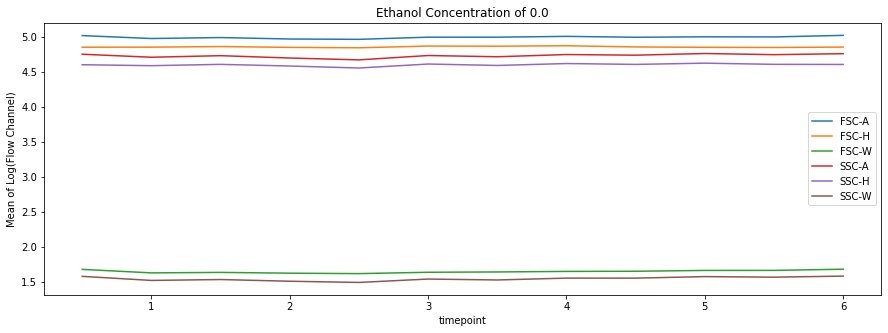

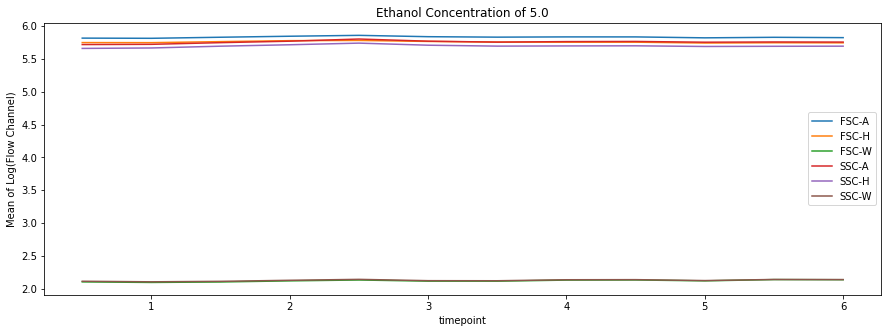

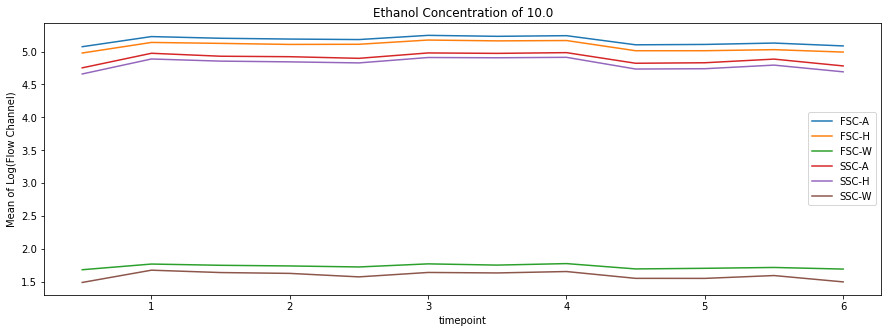

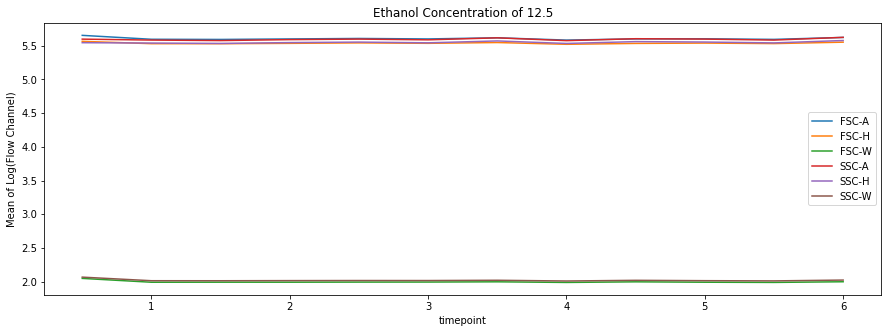

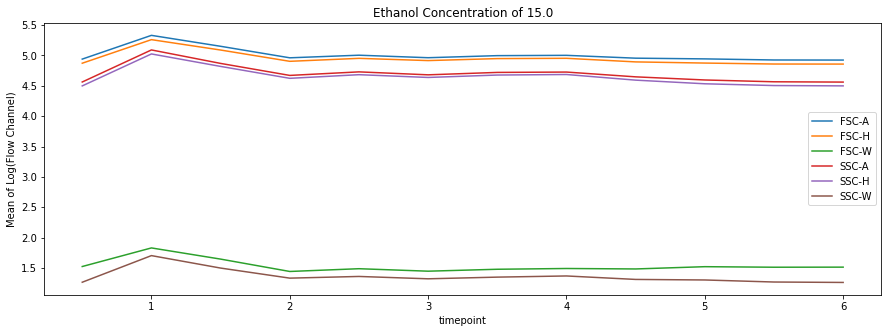

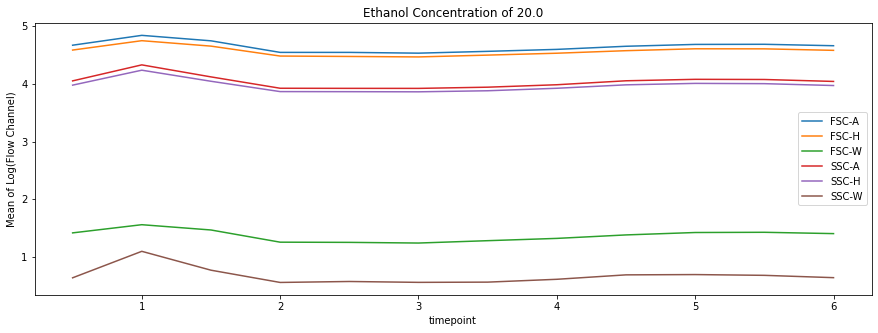

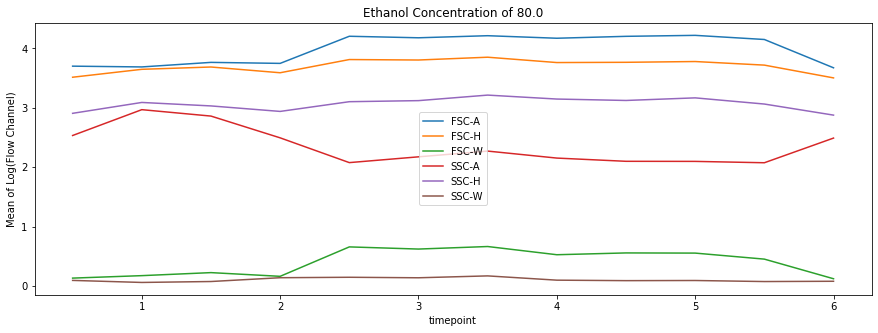

In [8]:
for conc in df1_means[n.inducer_concentration].unique():
    plot_df = df1_means.loc[df1_means[n.inducer_concentration] == conc]
    plt.figure(figsize=(15, 5))
    for col in n.morph_cols:
        sns.lineplot(data=plot_df, x=n.timepoint, y=col, label=col)
    plt.ylabel("Mean of Log(Flow Channel)")
    plt.title("Ethanol Concentration of {}".format(conc))

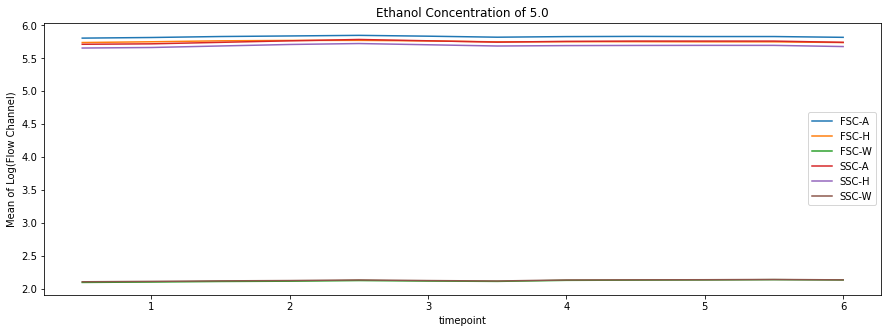

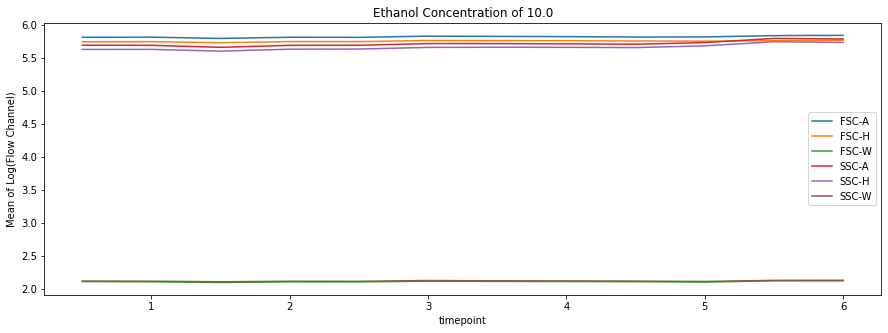

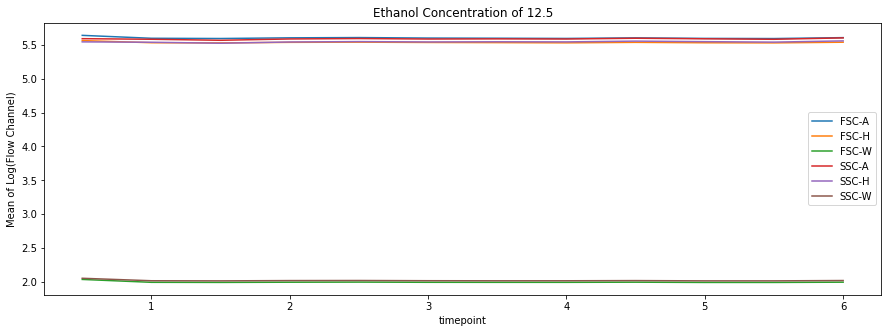

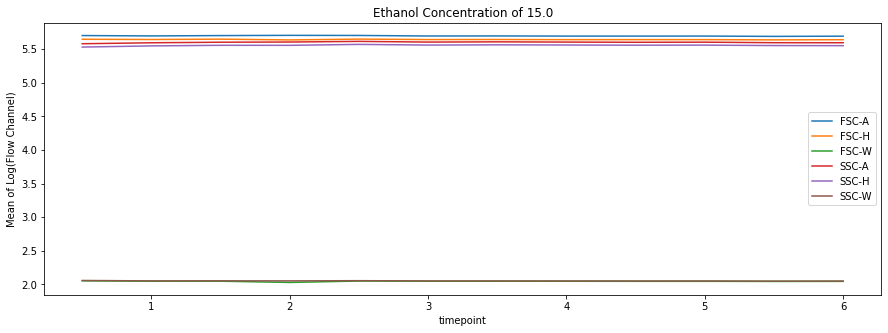

In [9]:
for conc in df2_means[n.inducer_concentration].unique():
    plot_df = df2_means.loc[df2_means[n.inducer_concentration] == conc]
    plt.figure(figsize=(15, 5))
    for col in n.morph_cols:
        sns.lineplot(data=plot_df, x=n.timepoint, y=col, label=col)
    plt.ylabel("Mean of Log(Flow Channel)")
    plt.title("Ethanol Concentration of {}".format(conc))

In [10]:
df2_cols = list(df2_means.columns.values)

In [11]:
df2_cols
cols_of_interest = [x for x in df2_cols if x not in (n.morph_cols + 
                                                     [n.timepoint, n.inducer_concentration, n.percent_live])]
# cols_of_interest

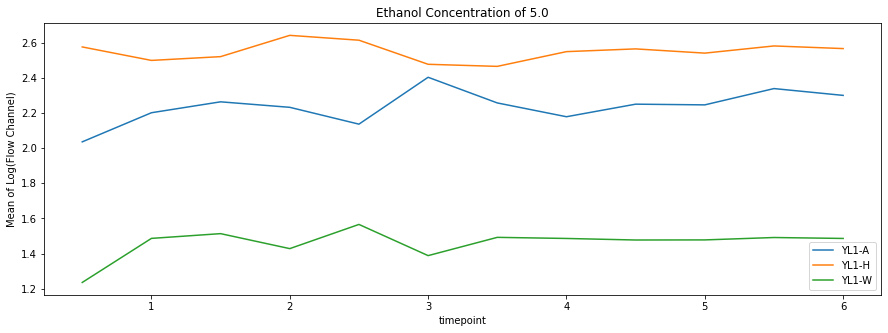

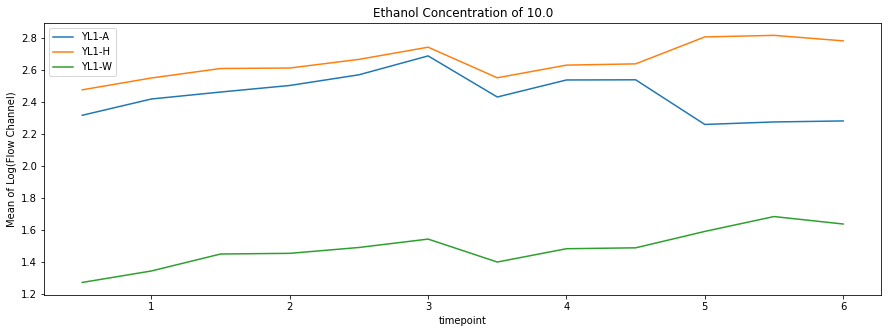

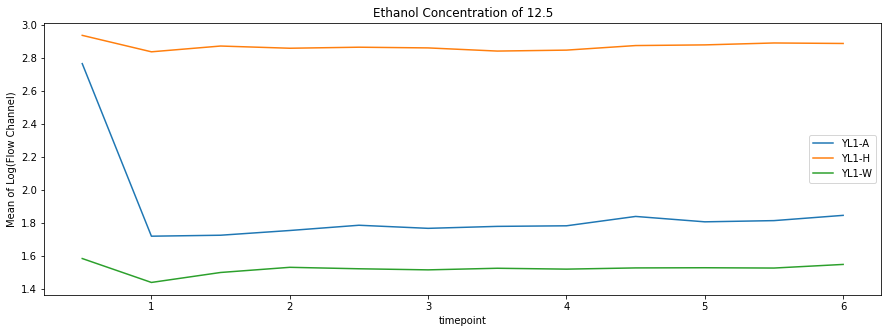

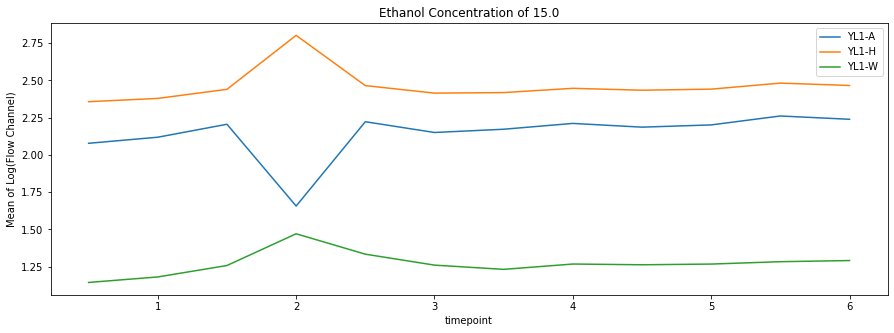

In [12]:
for conc in df2_means[n.inducer_concentration].unique():
    plot_df = df2_means.loc[df2_means[n.inducer_concentration] == conc]
    plt.figure(figsize=(15, 5))
    for col in [x for x in cols_of_interest if "YL1" in x]:
        sns.lineplot(data=plot_df, x=n.timepoint, y=col, label=col)
    plt.ylabel("Mean of Log(Flow Channel)")
    plt.title("Ethanol Concentration of {}".format(conc))

In [13]:
df1

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,inducer_concentration,timepoint,label,label_probs,percent_live
0,4.937493,4.852639,1.612784,4.545703,4.432199,1.477121,0.0,0.5,1.0,0.973972,39.67
1,4.881054,4.769717,1.591065,4.593319,4.483273,1.491362,0.0,0.5,1.0,0.903544,39.67
2,5.217273,5.056962,1.716003,5.115637,4.985498,1.662758,0.0,0.5,1.0,0.986633,39.67
3,4.837431,4.795463,1.568202,4.394942,4.333971,1.397940,0.0,0.5,1.0,0.808509,39.67
4,5.224023,4.771183,1.977724,4.895577,4.490436,1.838849,0.0,0.5,1.0,0.930113,39.67
...,...,...,...,...,...,...,...,...,...,...,...
259537,4.086538,3.939769,0.000000,4.006380,3.955592,0.000000,80.0,6.0,0.0,0.008962,0.00
259538,6.020599,5.369036,3.009876,6.020599,6.020599,3.009876,80.0,6.0,0.0,0.359544,0.00
259539,3.429591,3.334454,0.000000,3.146438,2.997386,0.000000,80.0,6.0,0.0,0.000011,0.00
259540,3.640680,3.509337,0.000000,3.005181,2.911690,0.000000,80.0,6.0,0.0,0.000799,0.00


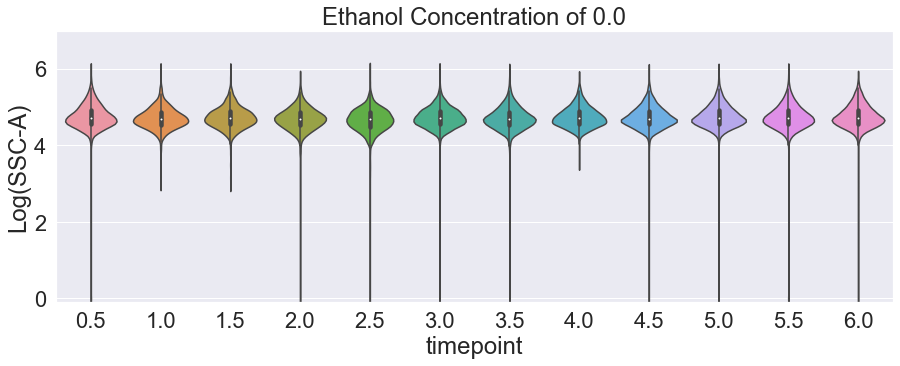

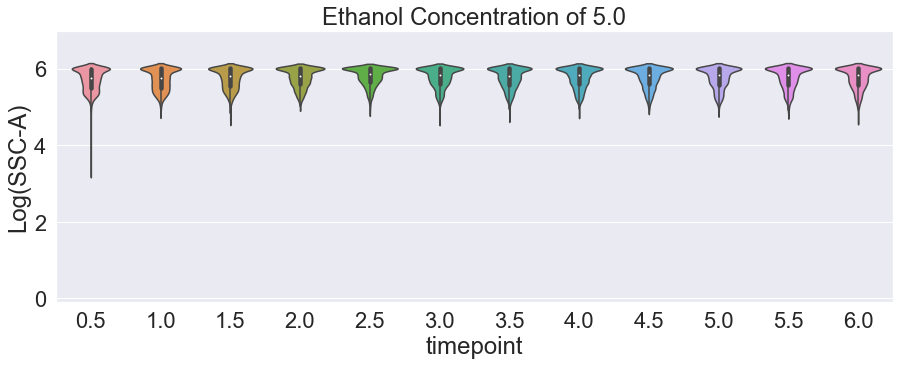

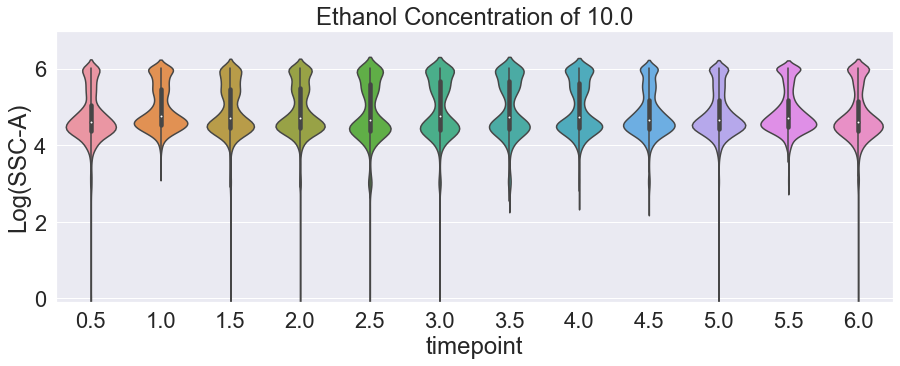

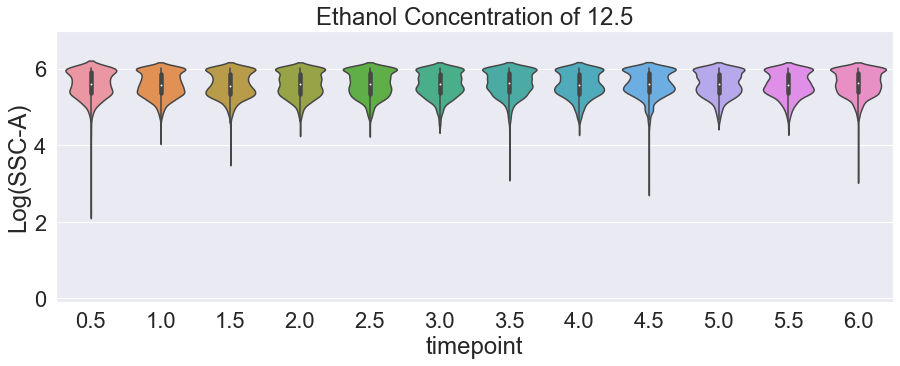

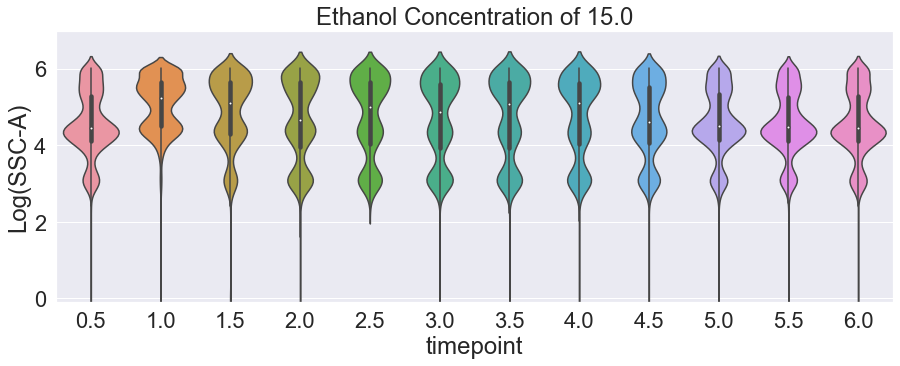

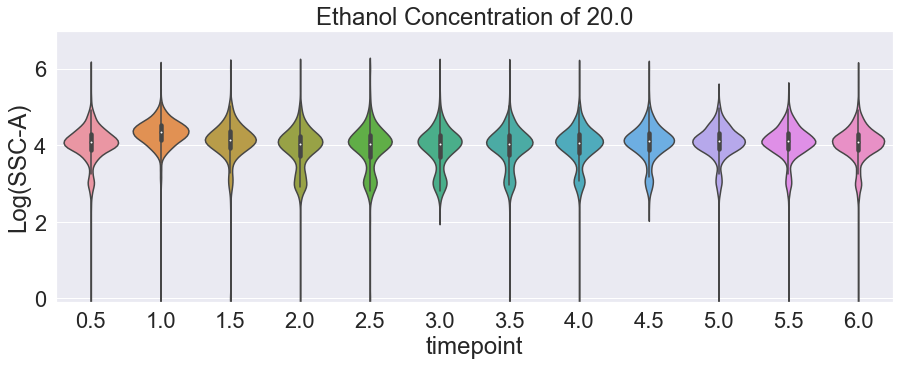

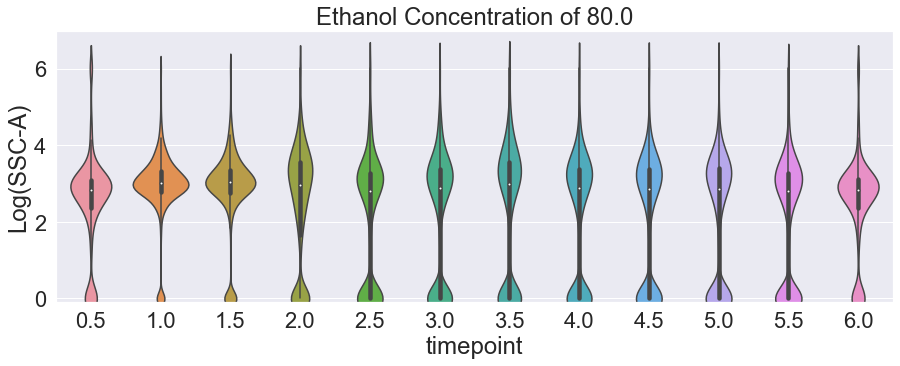

In [46]:
for conc in df1[n.inducer_concentration].unique():
    plot_df = df1.loc[df1[n.inducer_concentration] == conc]
    plt.figure(figsize=(15, 5))
    for col in ["SSC-A"]:
        sns.violinplot(data=plot_df, x=n.timepoint, y=col)
    plt.ylabel("Log(SSC-A)")
    plt.title("Ethanol Concentration of {}".format(conc))
    plt.ylim(-0.1, 7)

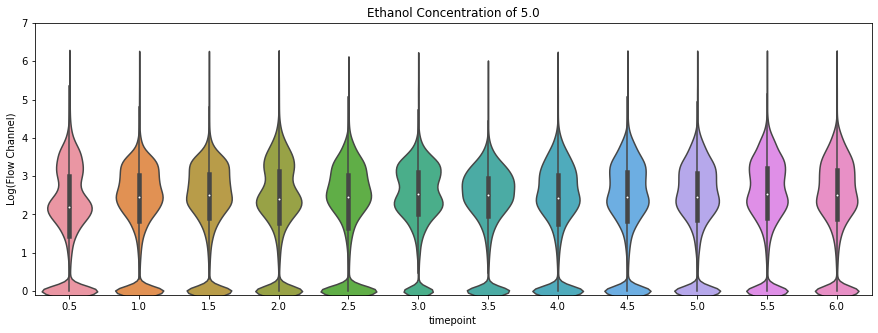

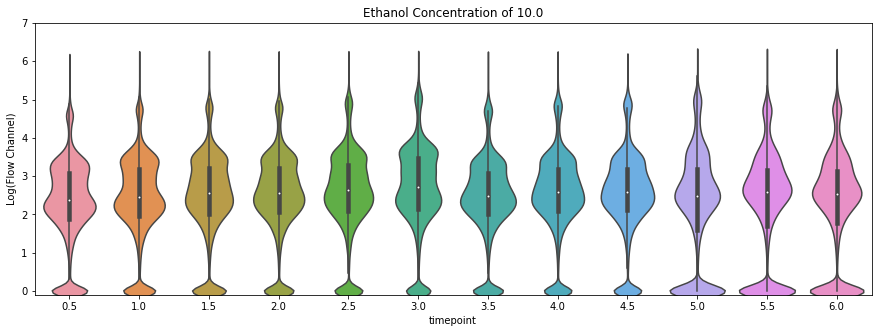

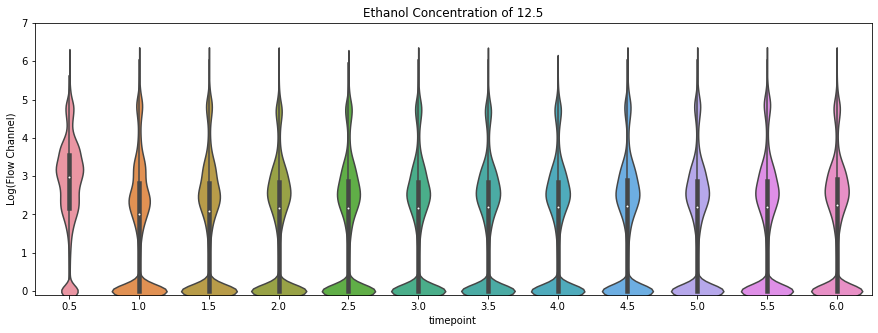

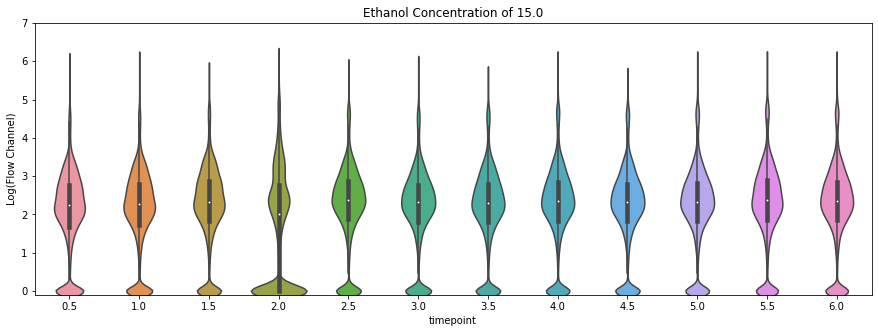

In [43]:
for conc in df2[n.inducer_concentration].unique():
    plot_df = df2.loc[df2[n.inducer_concentration] == conc]
    plt.figure(figsize=(15, 5))
    for col in ["YL1-A"]:
        sns.violinplot(data=plot_df, x=n.timepoint, y=col)
    plt.ylabel("Log(Flow Channel)")
    plt.title("Ethanol Concentration of {}".format(conc))
    plt.ylim(-0.1, 7)

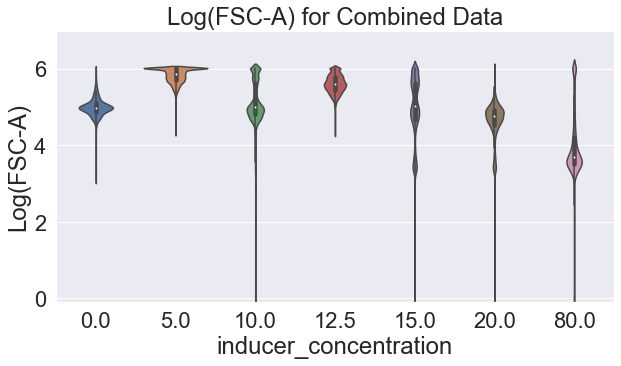

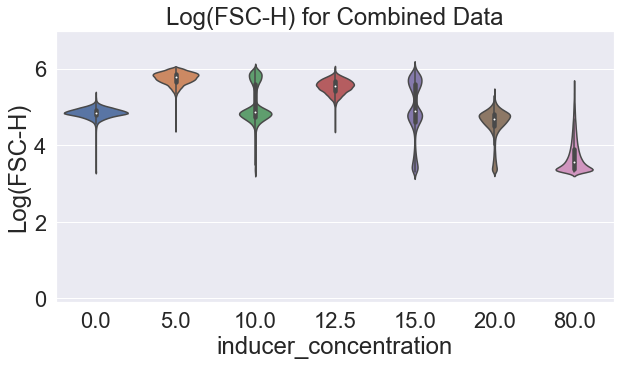

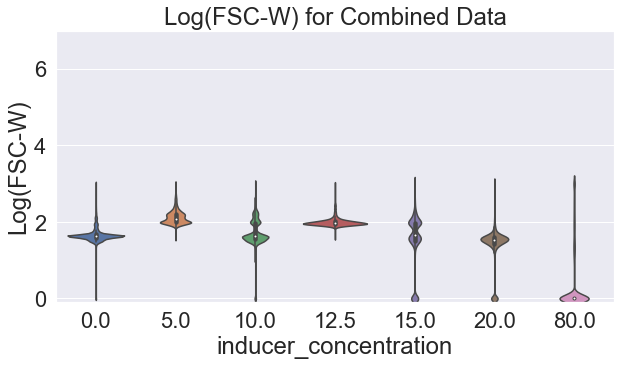

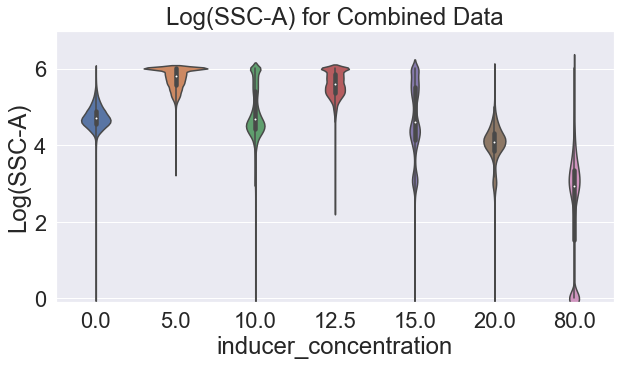

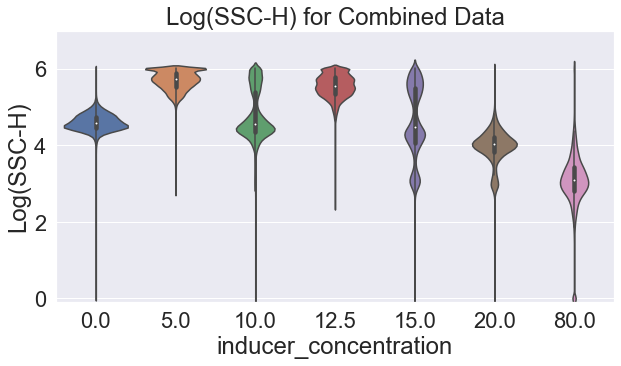

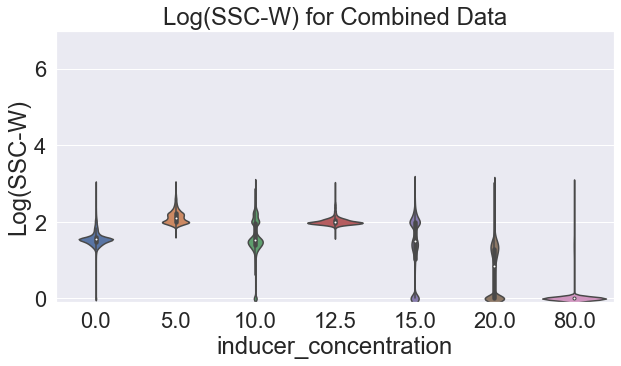

In [49]:
for col in n.morph_cols:
    plot_df = df1.copy()
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=plot_df, x=n.inducer_concentration, y=col)
    plt.ylabel("Log({})".format(col))
    plt.title("Log({}) for Combined Data".format(col))
    plt.ylim(-0.1, 7)

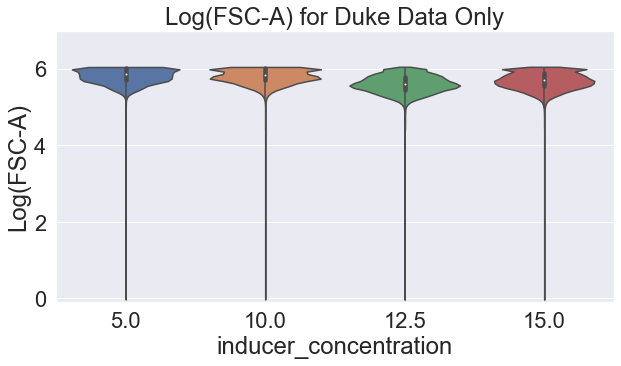

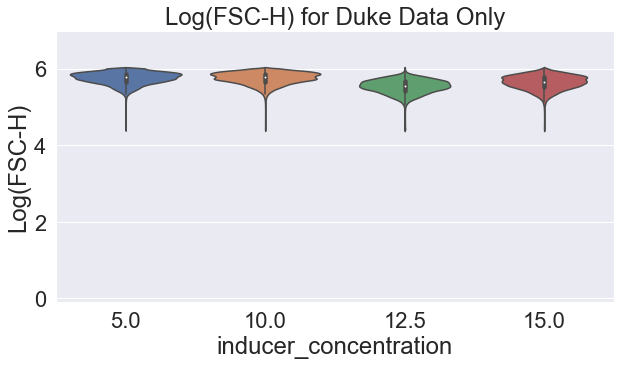

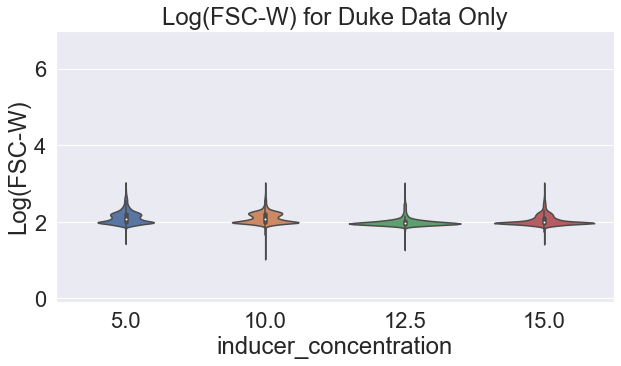

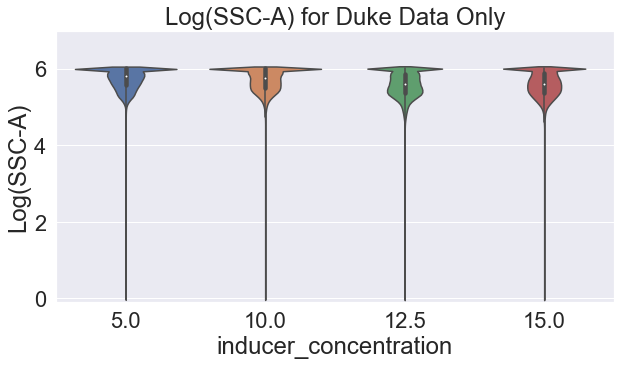

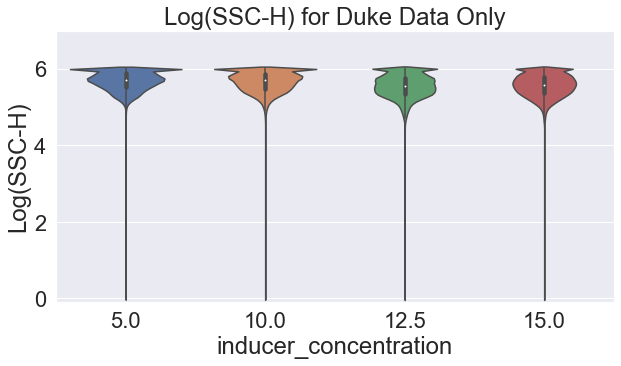

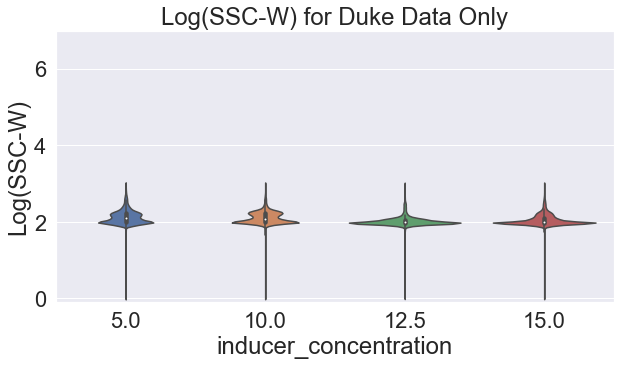

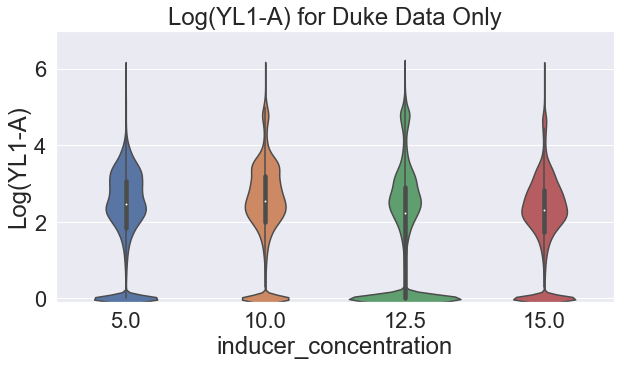

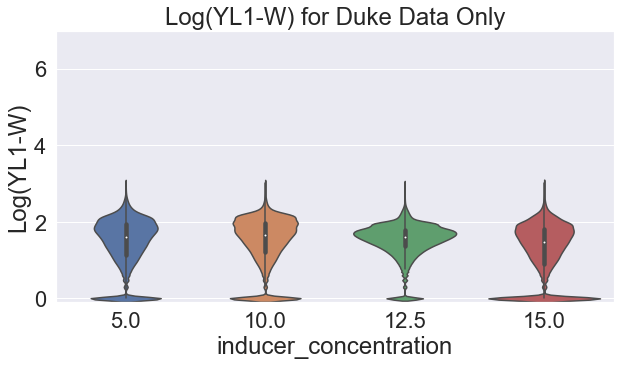

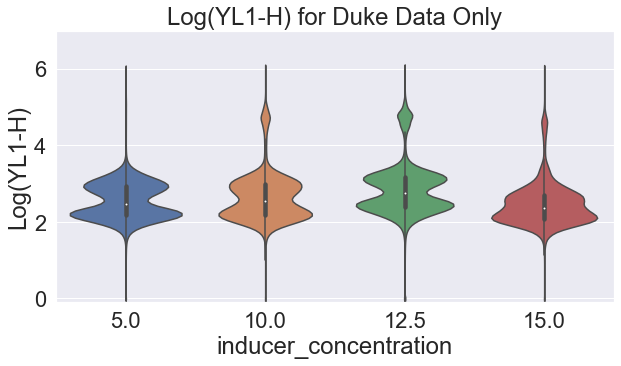

In [50]:
for col in n.morph_cols + ["YL1-A", "YL1-W", "YL1-H"]:
    plot_df = df2.copy()
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=plot_df, x=n.inducer_concentration, y=col)
    plt.ylabel("Log({})".format(col))
    plt.title("Log({}) for Duke Data Only".format(col))
    plt.ylim(-0.1, 7)

In [18]:
df2[n.inducer_concentration] = df2[n.inducer_concentration].astype(str)

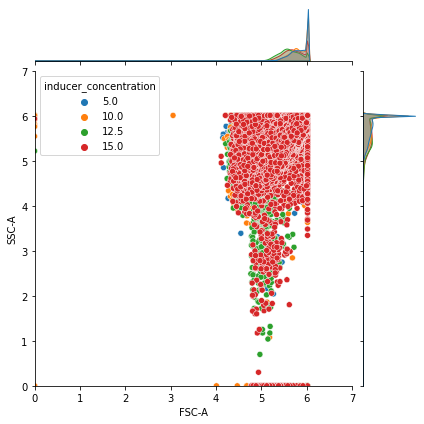

In [19]:
sns.jointplot(data=df2, x="FSC-A", y="SSC-A", kind="scatter", hue=n.inducer_concentration,
              xlim=(0,7), ylim=(0,7), legend="full")

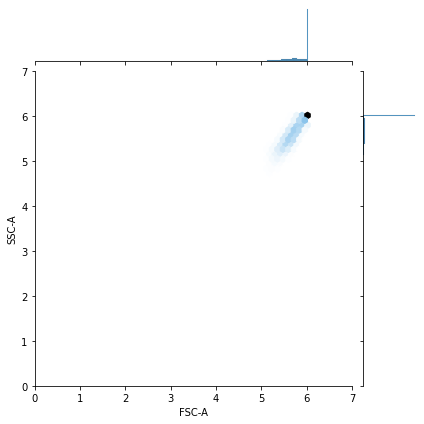

In [20]:
sns.jointplot(data=df2, x="FSC-A", y="SSC-A", kind="hex",
              xlim=(0,7), ylim=(0,7))

In [26]:
e = "15.0"
t = 3.0
df2_sub = df2.loc[(df2[n.inducer_concentration] == e) & (df2[n.timepoint] == t)]

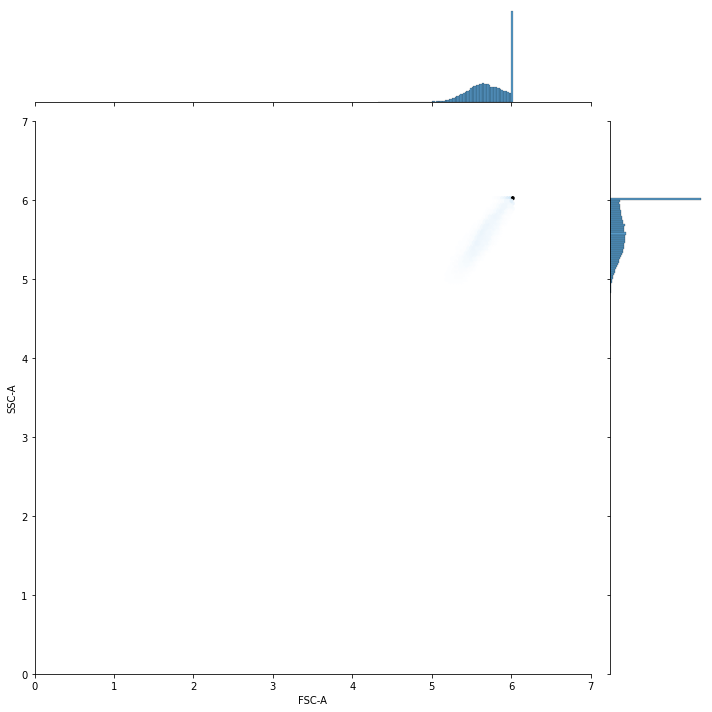

In [39]:
sns.jointplot(data=df2_sub, x="FSC-A", y="SSC-A", kind="hex",
              xlim=(0,7), ylim=(0,7), height=10)

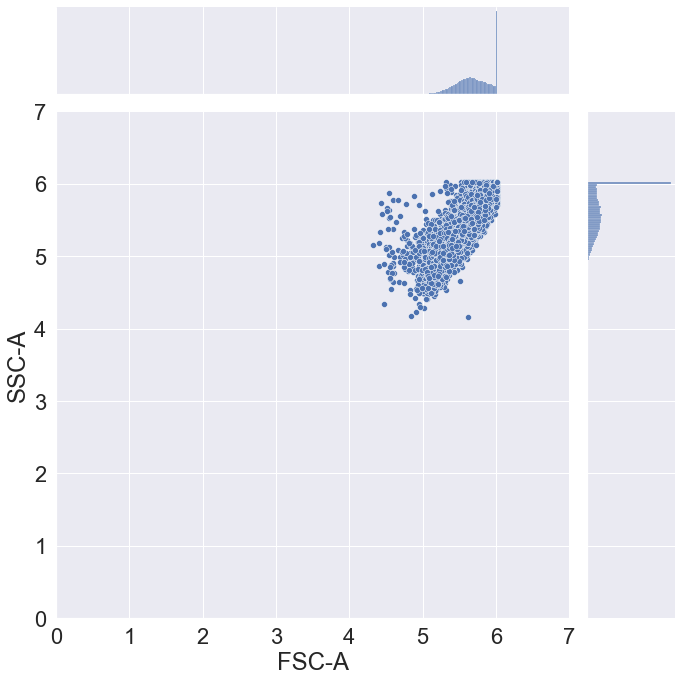

In [52]:
sns.set(font_scale=2.0)
sns.jointplot(data=df2_sub, x="FSC-A", y="SSC-A", kind="scatter",
              xlim=(0,7), ylim=(0,7), height=10)

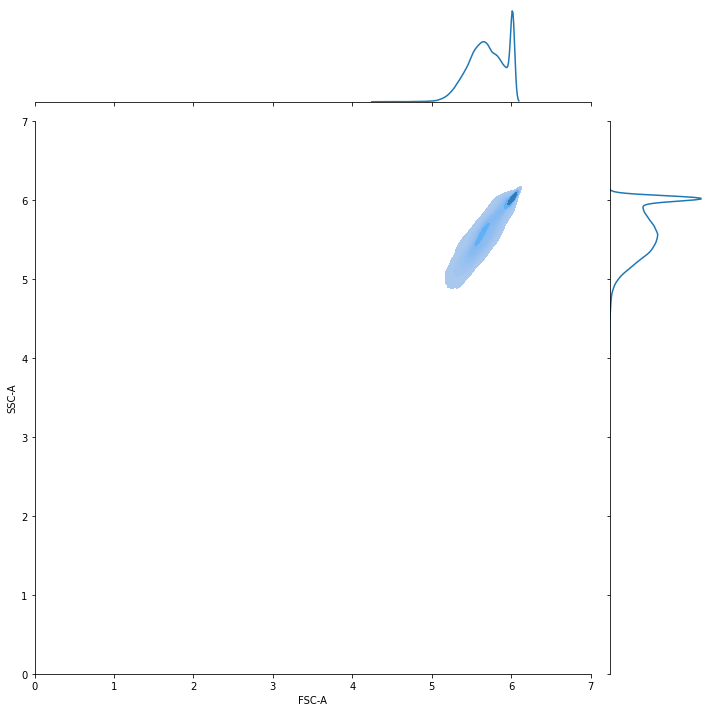

In [42]:
sns.jointplot(data=df2_sub, x="FSC-A", y="SSC-A", kind="kde", shade=True,
              xlim=(0,7), ylim=(0,7), height=10)

/Users/he/anaconda3/envs/pysd2cat/lib/python3.6/site-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


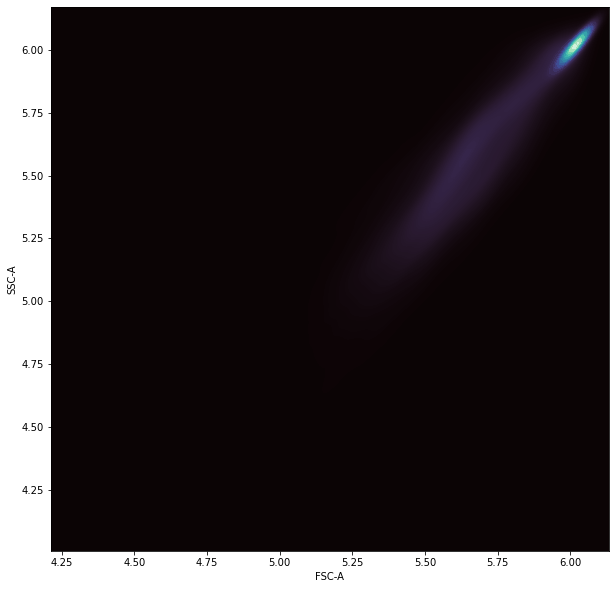

In [41]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df2_sub, x="FSC-A", y="SSC-A", kind="kde",
            fill=True, thresh=0, levels=100, cmap="mako")